<a href="https://colab.research.google.com/github/yabbou/Career_Forecasting/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Career Forecasting**

Introduction
==

**Abstract**

Contributing to society is critical to a healthy economy and (most often) a stable state of mind. But what career path should a high school graduate follow? Forecasting a young professional's career path depends on variables such as the individual's natural and developed abilities, his intersets, and the job opportunities available in his city. Some students may enroll in college programs that will likely lead to employment, some want high salaries, others purely pursue their passions. Everyone needs to be financially supported. We will attempt to predict the significant factors that influence a high school graduate's professional direction, such as income, major, personal preferences, and situational circumstances. **_Can noticeable trends or student preferences be found among students in the United States towards any specific majors?_** Especially without personal prefernce, only based on statistical knoweledge? We will use our familiarity with data science to analyze appropriate variables, and looking for each variable's influence on the trend. The project could offer insight to students and young adults in deciding a career paths they might practically find appealing, based on those that past students have chosen. The data will be dowloaded as CSVs to the local computer, uploaded to Github, and analyzed in Google Colab using Python. The datasets consist of (1) overaching occupation employment changes from 2006 to 2015, (2) more detailed data (primarily) from graduating college students, and (3) touching on the likeliness of job automation. A detailed Exploratory Data Analysis (EDA) will be preformed to become aquainted with the data and the more obviuos trends. Varaible relationships will be analysed, the data will be tested for multi-collinearity, and relevant charts will be dispalyed. The data will then be prepared to select the more primary, trend-determining features. Regression and classification models will later be compared and used to predict a student's desired major. 


**General Introduction**

Contributing to society is critical to a healthy economy and (most often) a stable state of mind. But what career path should a high school graduate follow? 

Forecasting a young professional's career path depends on variables such as the individual's natural and developed abilities, his intersets, and the job opportunities available in his city. Some students may enroll in college programs that will likely lead to employment, some want high salaries, others purely pursue their passions.

By [2016](https://data.world/nces/high-school-completion-and-bachelors-degree-attainment), 88% of students in the US earned a high school diploma, and 33% a college degree. And everyone needs to be financially supported.

**Research Questions**

We will attempt to predict the significant factors that influence a high school graduate's professional direction, such as income, major, personal preferences, and situational circumstances. **_Can noticeable trends or student preferences be found among students in the United States towards any specific majors?_**

We will use our familiarity with data science to analyze appropriate variables, and looking for each variable's influence on the trend. The project could offer insight to students and young adults in deciding a career paths they might practically find appealing, based on those that past students have chosen.

**Data**

The data will be dowloaded as CSVs to the local computer, uploaded to Github, and analyzed in Google Colab using Python. The datasets consist of:

**[Employed Persons Dataset](https://data.world/nsf/employed-persons-by-detailed-occupation)**
  
Column | Description
--- | ---
  `Occupation` | 28 occupation general categories
  Years| Years `2006` to `2015`
 
**[College Majors Dataset](https://data.world/fivethirtyeight/college-majors)** 

One dataset of former college students, one of former graduate students, and one combining both groups. Here are the columns in the `College Graduates` dataset:

Column | Description
--- | ---
Rank	| Rank by median earnings
Major	| Major description
Major_category | Category of major from Carnevale et al
Total	| Total number of people enrolled in the major
Men	| Male graduates
Women	| Female graduates
ShareWomen | Women as share of total
Employed| Number employed 
Full_time|	Employed 35 hours or more
Part_time|	Employed less than 35 hours
Full_time_year_round|	Employed at least 50 weeks and at least 35 hours
Unemployed|	Number unemployed
Unemployment_rate|	Unemployed / (Unemployed + Employed)
Median|	Median earnings of full-time, year-round workers
P25th|	25th percentile of earnigns
P75th|	75th percentile of earnings
College_jobs|	Number with job requiring a college degree
Non_college_jobs|	Number with job not requiring a college degree
Low_wage_jobs|	Number in low-wage service jobs

**[Likelihood of Automation Dataset](https://data.world/wnedds/jobs-by-likelihood-of-automation)** 

Column | Description
--- | ---
Probability	| Likeliness, basesd on external, professional assessment
EOC	| Probability score, based on external algorithm
Occupation | Slightly above 700 occupations

**[The Burea of Labor Statistics](https://data.world/vizwiz/employment-unemployment-by-state-and-month)** 

To compare predictions with the professional job trend predictions, time granting.

**Research Approach**

A detailed Exploratory Data Analysis (EDA) will be preformed to become aquainted with the data and the more obviuos trends. Varaible relationships will be analysed, the data will be tested for multi-collinearity, and relevant charts will be dispalyed. The data will then be prepared to select the more primary, trend-determining features. Regression and classification models will later be compared and used to predict a student's desired major.

**Summary:**

Step 1: Introduction

Step 2: EDA

Step 3: Data Preparation

Step 4: Regression and Classification Models

Step 5: Conclusion

Part 2: EDA
==

Here are some of the data tables that will be analysed:

In [165]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report 
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC


import warnings
warnings.filterwarnings("ignore")

def displayRows(df):
  rows = df.shape[0]
  print('Rows:',rows)

employed_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employed_usa_2006_2015.csv").iloc[:-2,:]
displayRows(employed_df)
employed_df.head()

Rows: 28


,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,All occupations,"144,427","146,047","145,362","139,877","139,064","139,869","142,469","143,929","146,305","148,834"
1,"Management, professional, and related occupations","50,420","51,787","52,761","52,219","51,743","52,546","54,043","54,711","56,050","57,960"
2,"Management, business, and financial operations...","21,233","21,577","22,059","21,529","20,938","21,589","22,678","22,794","23,171","24,108"
3,Professional and related occupations,"29,187","30,210","30,702","30,690","30,805","30,957","31,365","31,917","32,879","33,852"
4,Architect,221,240,233,204,184,181,195,193,178,203


In [166]:
employed_college_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_college_students_2010_2012.csv")
employed_college_students_df = employed_college_students_df.drop(['Major_code','Sample_size'],axis='columns') #Major_code was relevant when retrieving the data from original source 
displayRows(employed_college_students_df)
employed_college_students_df.head()

Rows: 173


,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Are there any null values for which to account?



In [167]:
def displayNulls(df):
  nulls = df[df.isnull().sum()]
  print(nulls,'\n')

def displayNullCount(df):
  null_count = df.isnull().sum()
  print(null_count[df.isnull().sum() > 0],'\n')

employed_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_all_students_2010_2012.csv")
employed_students_df = employed_students_df.drop(['Major_code'],axis='columns') 

employed_graduate_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_graduate_school_students_2010_2012.csv")
employed_graduate_students_df = employed_graduate_students_df.drop(['Major_code'],axis='columns') 


displayNullCount(employed_df)
displayNullCount(employed_students_df)
displayNullCount(employed_college_students_df)
displayNullCount(employed_graduate_students_df)


Series([], dtype: int64) 

Series([], dtype: int64) 

Unemployment_rate    1
dtype: int64 

Series([], dtype: int64) 



Thankfully, most of the data cleaning was performed before uploaded to the public domain. But there indeed remains a single null value in the `employed_college_students_df` table.

In [168]:
def displayNullRow(df):
  return df[df.isnull().any(axis=1)]

displayNullRow(employed_college_students_df)

,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,124,1756,1323,0.429685,0,111,0,111,0,NaN,40000,40000,40000,0,0,0


The last row holds an unknown `Unemployment_rate`. Though, the `Unemployed` column has a value of 0, so the rate could be deduced to also be 0.

In [169]:
employed_college_students_df = employed_college_students_df.replace(np.NAN,0) 
displayNullCount(employed_college_students_df)

Series([], dtype: int64) 



Here are the unique values:

In [170]:
def displayUnique(df):
  COLS = df.columns
  for x in range(COLS.shape[0]):
    print(COLS[x])
    print(np.unique(df.iloc[:,x].sort_values(ascending=False)),'\n')

displayUnique(employed_df)

Occupation
['All occupations' 'Architect' 'Biological or life scientist' 'Chemist'
 'Dietitian' 'Economist and market and survey researcher' 'Engineer'
 'Engineering and related technologist or technician'
 'Health technologist or technician' 'Lawyer or judge'
 'Management, business, and financial operations occupations'
 'Management, professional, and related occupations'
 'Mathematical or computer scientist' 'Other health care professional'
 'Other natural scientist' 'Other occupations'
 'Other professional or related occupation'
 'Other social scientist or urban planner' 'Pharmacist' 'Physician'
 "Physicians' assistant" 'Professional and related occupations'
 'Psychologist' 'Registered nurse' 'Science technician'
 'Teacher, except postsecondary (college and university)'
 'Teacher, postsecondary (college and university)' 'Therapist'] 

2006
['1,031' '1,194' '1,887' '116' '144,427' '159' '189' '2,219' '2,529'
 '21,233' '221' '243' '245' '29,187' '3,209' '308' '354' '414' '5,595'
 '50,

In [171]:
displayUnique(employed_students_df)

Major
['ACCOUNTING' 'ACTUARIAL SCIENCE' 'ADVERTISING AND PUBLIC RELATIONS'
 'AEROSPACE ENGINEERING' 'AGRICULTURAL ECONOMICS'
 'AGRICULTURE PRODUCTION AND MANAGEMENT' 'ANIMAL SCIENCES'
 'ANTHROPOLOGY AND ARCHEOLOGY' 'APPLIED MATHEMATICS'
 'ARCHITECTURAL ENGINEERING' 'ARCHITECTURE'
 'AREA ETHNIC AND CIVILIZATION STUDIES' 'ART AND MUSIC EDUCATION'
 'ART HISTORY AND CRITICISM' 'ASTRONOMY AND ASTROPHYSICS'
 'ATMOSPHERIC SCIENCES AND METEOROLOGY' 'BIOCHEMICAL SCIENCES'
 'BIOLOGICAL ENGINEERING' 'BIOLOGY' 'BIOMEDICAL ENGINEERING' 'BOTANY'
 'BUSINESS ECONOMICS' 'BUSINESS MANAGEMENT AND ADMINISTRATION'
 'CHEMICAL ENGINEERING' 'CHEMISTRY' 'CIVIL ENGINEERING'
 'CLINICAL PSYCHOLOGY' 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY'
 'COMMERCIAL ART AND GRAPHIC DESIGN'
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES'
 'COMMUNICATION TECHNOLOGIES' 'COMMUNICATIONS'
 'COMMUNITY AND PUBLIC HEALTH' 'COMPOSITION AND RHETORIC'
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY'
 'COMPUTER AND INFORMATION SYSTEMS' 'COM

Though, the `employed_df` appears to only hold object types (even for its numeric data). The data will now be converted so it could be more easily analysed.

In [172]:
SHOULD_BE_NUMERIC_COLS = range(2006,2015+1)
SHOULD_BE_NUMERIC_COLS = [str(col) for col in SHOULD_BE_NUMERIC_COLS]

def convertStringValuesToIntegers(df,cols):
  for col in df[cols]:
    df[col] = [int(x.replace(',','')) for x in df[col]]
  return df

employed_df = convertStringValuesToIntegers(employed_df,SHOULD_BE_NUMERIC_COLS)

Great. Now let's see some general statistics:

In [173]:
employed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
2006,28.0,13159.321429,32660.576309,65.0,237.50,768.0,3805.50,144427.0
2007,28.0,13360.392857,32994.748145,73.0,240.75,793.5,4046.50,146047.0
2008,28.0,13363.892857,32795.491137,75.0,239.75,780.0,4254.75,145362.0
2009,28.0,12952.250000,31508.283115,68.0,228.75,809.5,4087.75,139877.0
2010,28.0,12881.285714,31330.881507,79.0,237.25,800.5,4133.00,139064.0
2011,28.0,12973.142857,31494.094816,82.0,263.25,791.5,4178.75,139869.0
2012,28.0,13226.642857,32062.987122,92.0,276.25,837.0,4329.25,142469.0
2013,28.0,13374.464286,32388.486990,82.0,274.25,846.0,4466.50,143929.0
2014,28.0,13626.392857,32910.608067,69.0,293.00,918.0,4736.50,146305.0
2015,28.0,13910.000000,33454.270693,71.0,291.00,940.5,4826.00,148834.0


General fall and net rise in minimum (enrolled) and median/maximum (salaries).

Now the numeric columns in the more detialed `Dataframe`, which includes the unemployment data, alterantive education jobs, and many more majors:

In [174]:
employed_students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,173.0,230256.635838,422068.483149,2396.0,24280.000000,75791.000000,205763.000000,3.123510e+06
Employed,173.0,166161.982659,307324.399668,1492.0,17281.000000,56564.000000,142879.000000,2.354398e+06
Employed_full_time_year_round,173.0,126307.774566,242425.389073,1093.0,12722.000000,39613.000000,111025.000000,1.939384e+06
Unemployed,173.0,9725.034682,18022.040192,0.0,1101.000000,3619.000000,8862.000000,1.472610e+05
Unemployment_rate,173.0,0.057355,0.019177,0.0,0.046261,0.054719,0.069043,1.561475e-01
Median,173.0,56816.184971,14706.226865,35000.0,46000.000000,53000.000000,65000.000000,1.250000e+05
P25th,173.0,38697.109827,9414.524761,24900.0,32000.000000,36000.000000,42000.000000,7.800000e+04
P75th,173.0,82506.358382,20805.330126,45800.0,70000.000000,80000.000000,95000.000000,2.100000e+05


>Note: 
>
>The **average** major enrollment is 75,000. **Minimum** 2,000. **Maximum** 3 million. 
>
>The **average** median salary is \$56,000 USD. **Minimum** $35,000. **Maximum** \$1,250,000. 
>
>The **average** 75th salary percentile is \$82,500 USD. **Minimum** \$46,000. **Maximum** \$2,100,000. 

(This dataset apparently has a much larger data pool.)

(Just curious, but the greatest `Unemployemnt` is above 140,000 persons! Which profession holds that statistic?) 

In [175]:
condition = employed_students_df['Unemployed']==147261
employed_students_df.loc[condition]

,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,1939384,147261,0.058865,58000,39500,86000.0


A large value, but thankfully at least a much larger employment count--0.06% of the total gratuates of the major. 
>Note: this is the major with the most enrollments.

Here is a visual of the data:

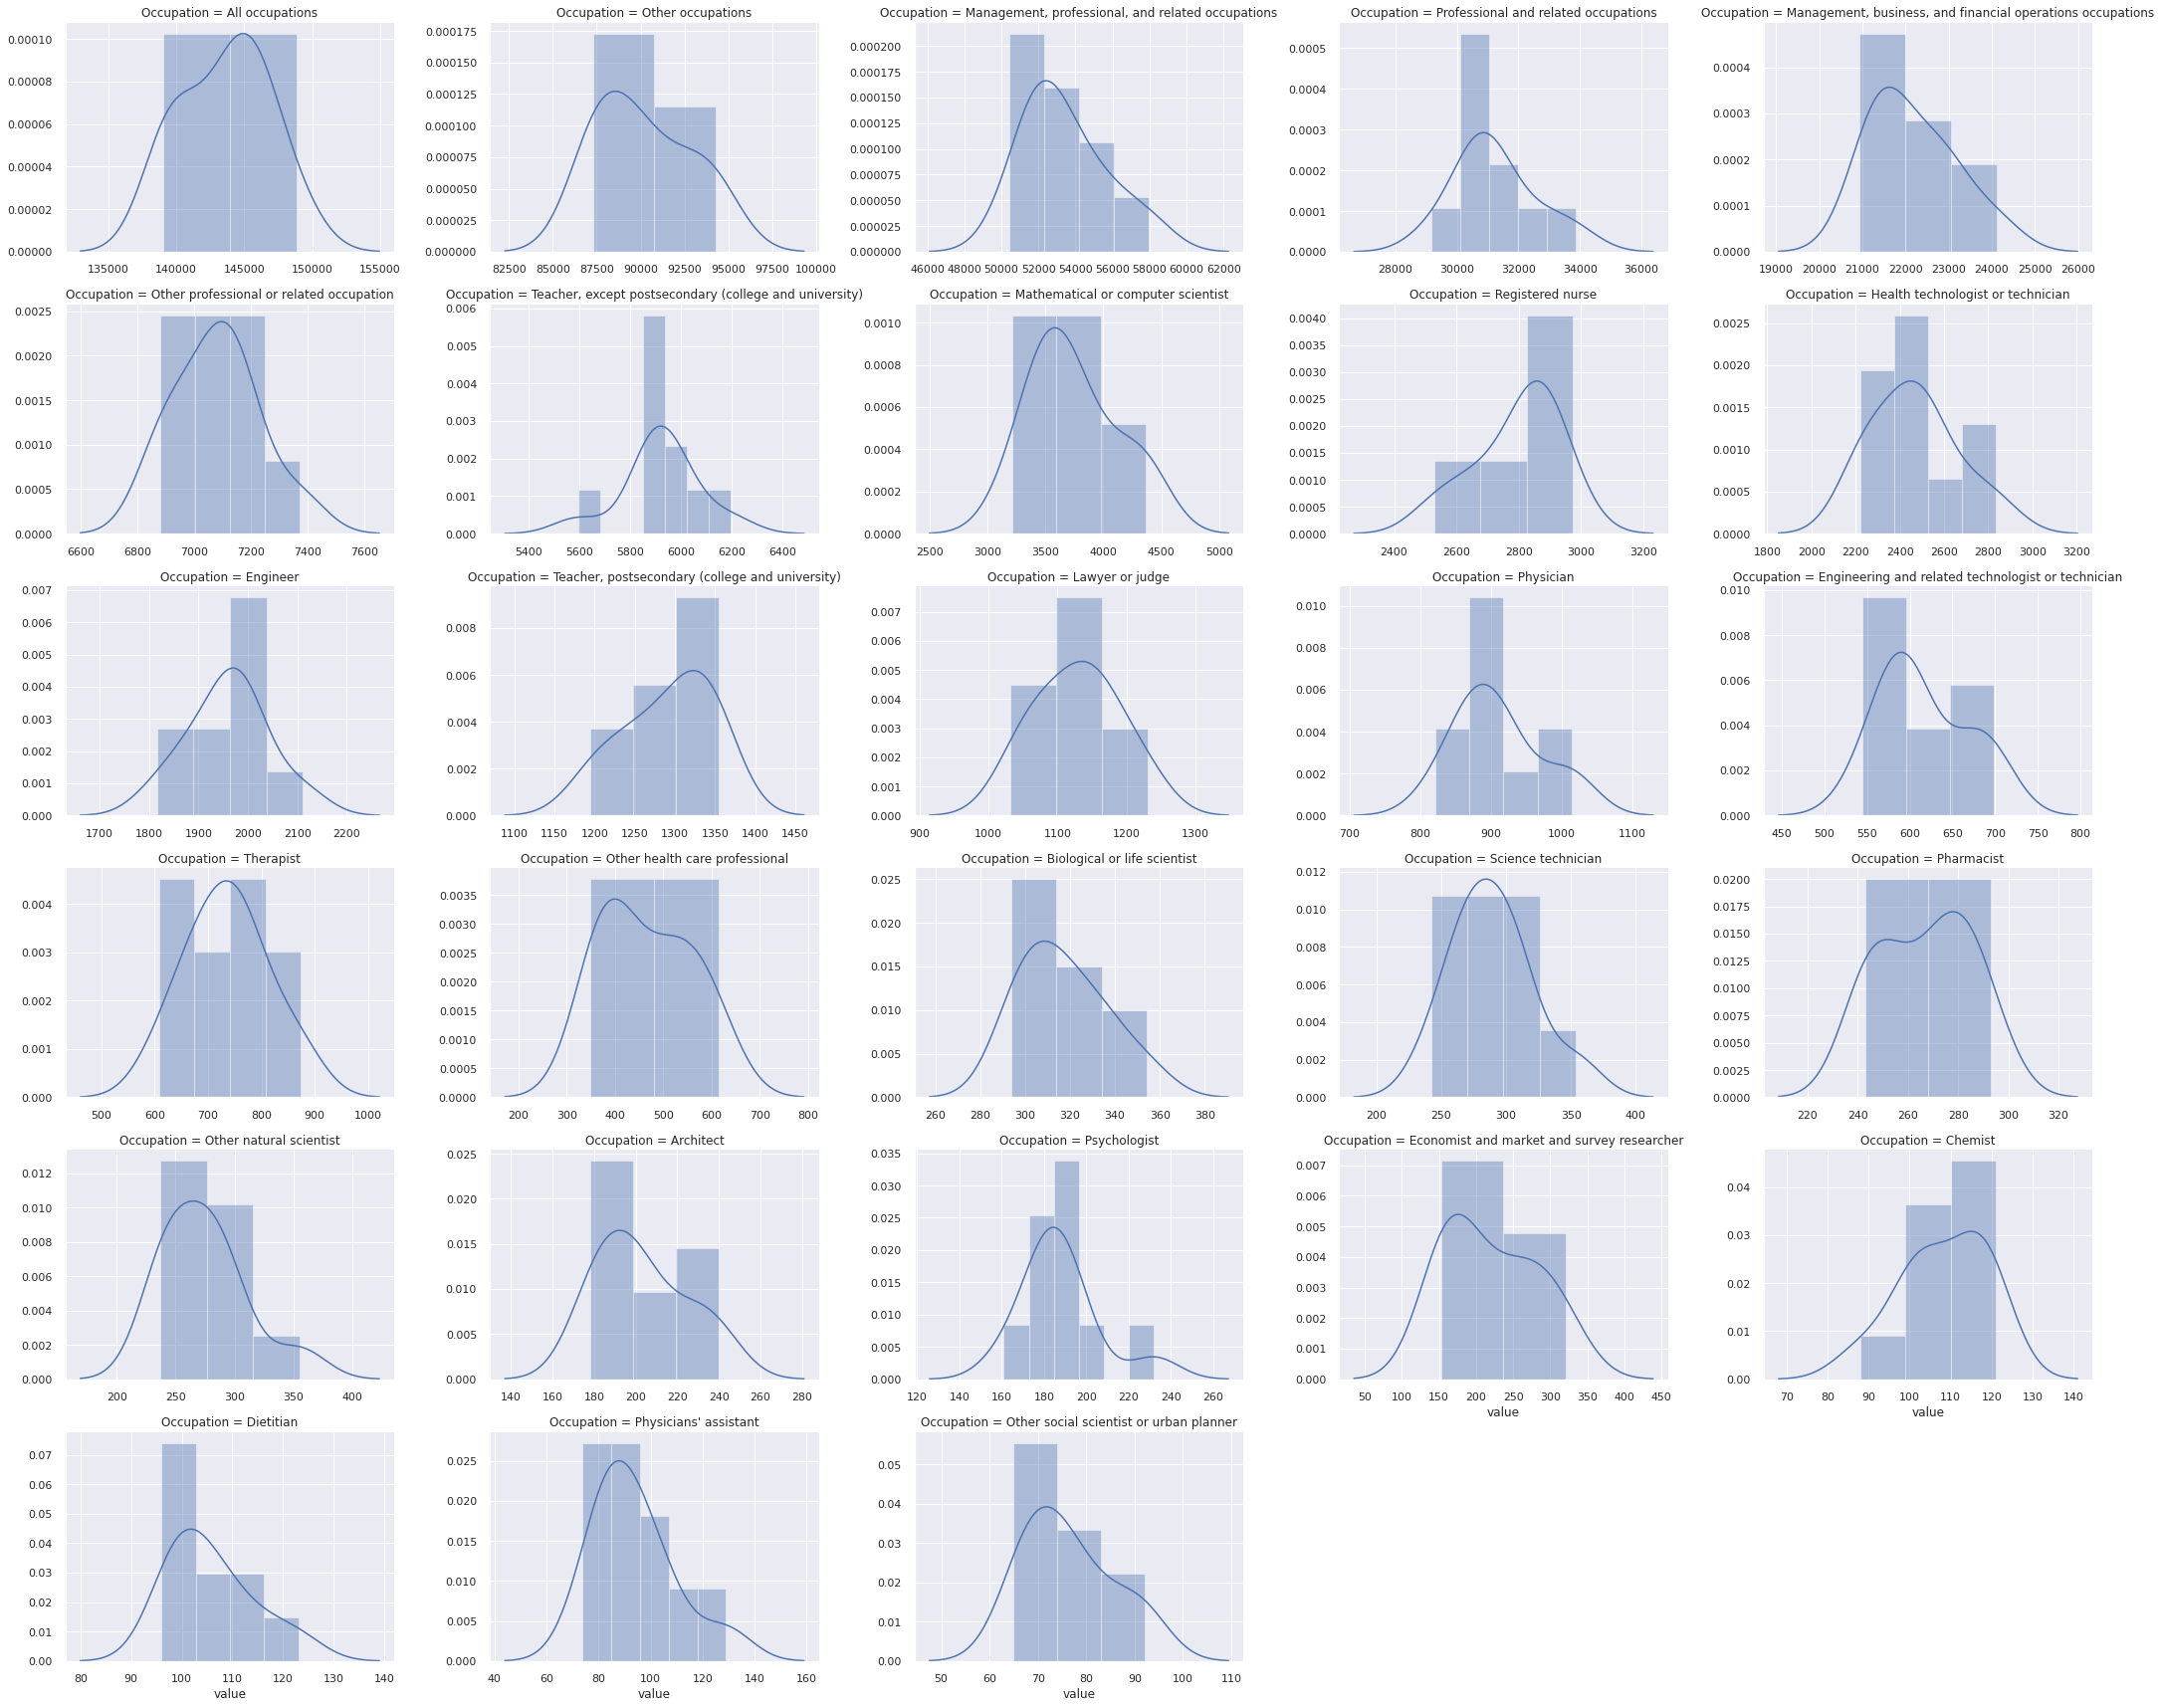

In [176]:
employed_by_number_df = employed_df.iloc[:,:].sort_values(by='2006',ascending=False)
transposed = employed_by_number_df.iloc[:,1:].T
transposed.columns = employed_by_number_df.iloc[:,0]

nd = pd.melt(transposed)
numeric = sns.FacetGrid(nd, col='Occupation', col_wrap=5, sharex=False, sharey=False, height=4,aspect=1.5)
numeric.map(sns.distplot, 'value')

All of the columns contained data with relatively balanced general distribution. 

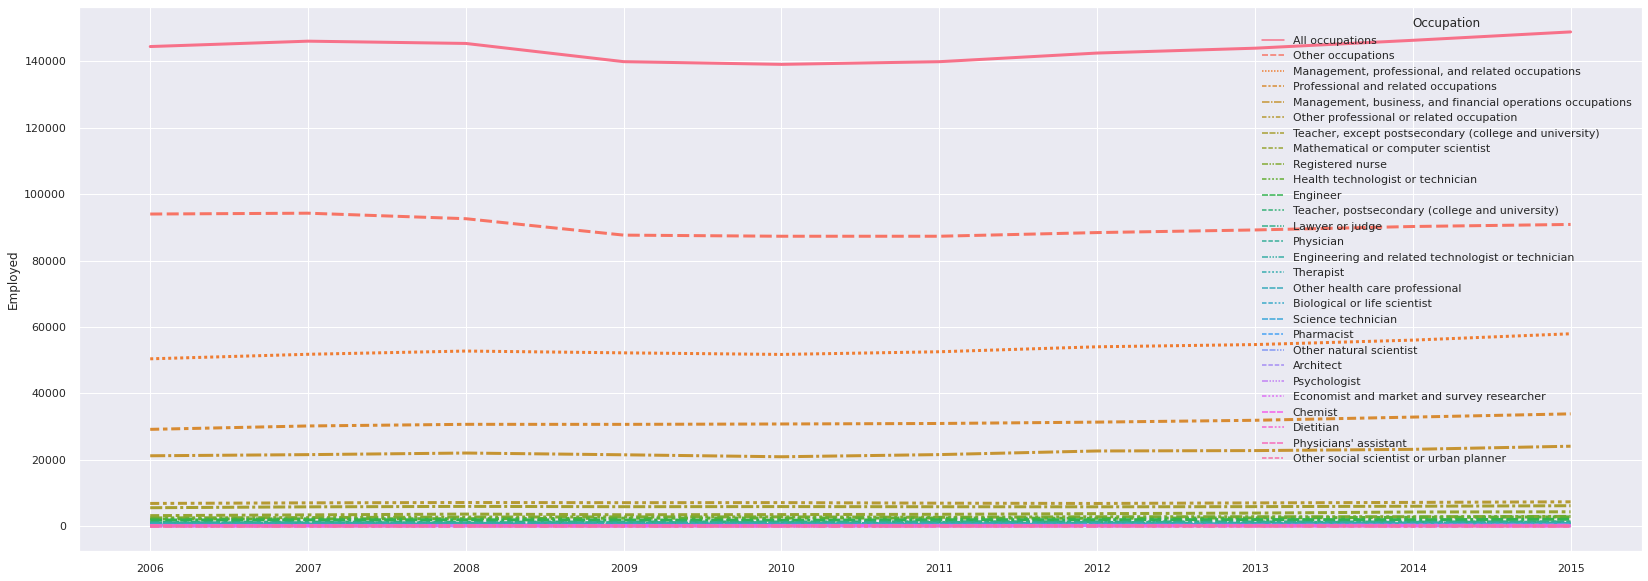

In [177]:
sns.set(rc={"figure.figsize":(28, 10)})
sns.lineplot(data=transposed,linewidth=3)
plt.ylabel('Employed')
plt.show()

In [178]:
employed_by_number_df.head(6)

,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,All occupations,144427,146047,145362,139877,139064,139869,142469,143929,146305,148834
27,Other occupations,94007,94260,92601,87658,87321,87322,88426,89217,90255,90874
1,"Management, professional, and related occupations",50420,51787,52761,52219,51743,52546,54043,54711,56050,57960
3,Professional and related occupations,29187,30210,30702,30690,30805,30957,31365,31917,32879,33852
2,"Management, business, and financial operations...",21233,21577,22059,21529,20938,21589,22678,22794,23171,24108
26,Other professional or related occupation,6884,7060,7161,7111,7131,6964,6881,7045,7194,7370


In [179]:
employed_by_number_df.tail(2)

,Occupation,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
16,Physicians' assistant,85,87,99,91,99,82,108,129,84,74
25,Other social scientist or urban planner,65,73,75,68,79,90,92,82,69,71


The professions maintain around the same employment; some dropped and rose, other slowly increased. The majority of jobs have between 7,000 and 70 employed. Besides for the top four overarching category occupations--managements, professional, business/finance, and "other" jobs-- no obvious outlying employed jobs are present. 

Now, here are the other employment variables:

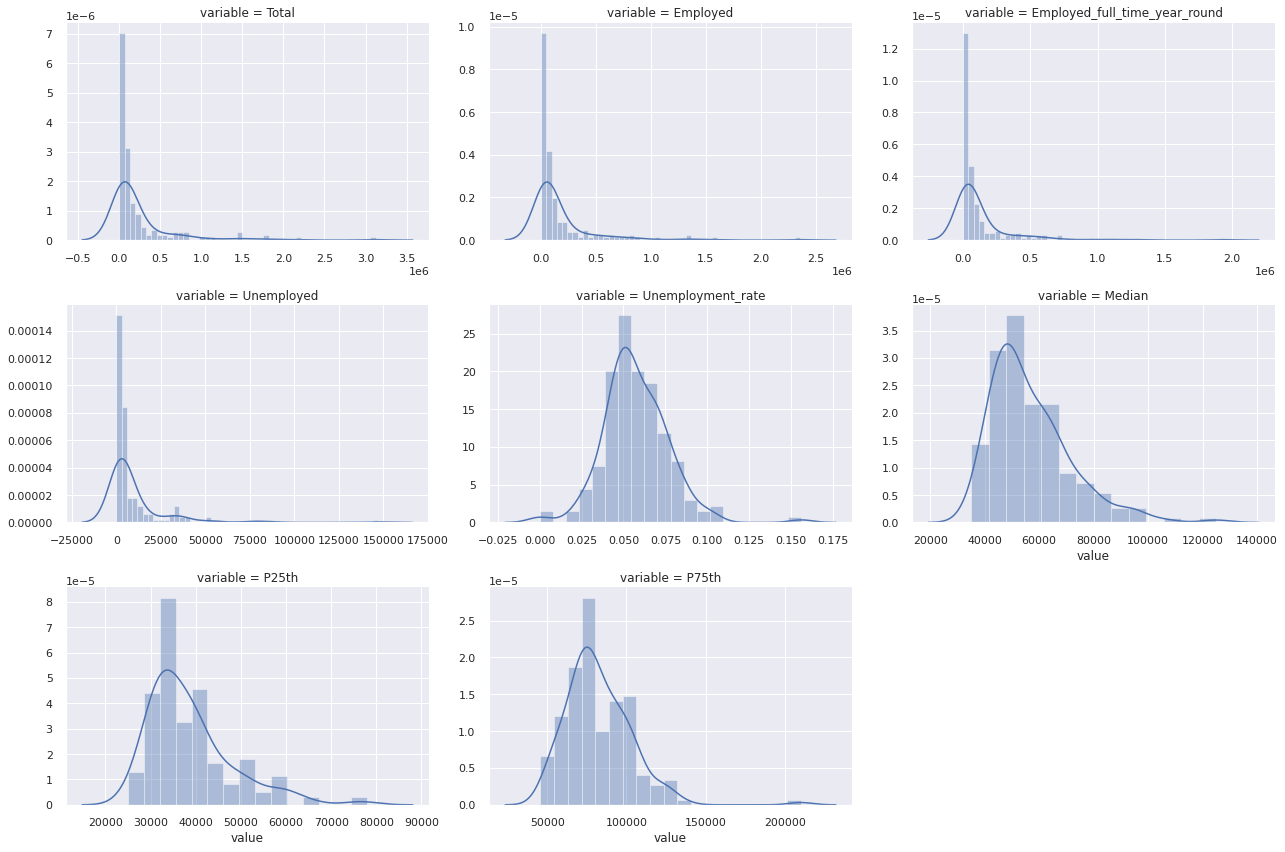

In [180]:
nd = pd.melt(employed_students_df.iloc[:,2:])
numeric = sns.FacetGrid(nd, col='variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5,)
numeric.map(sns.distplot, 'value')

They appear mostly balanced or right distributed.   

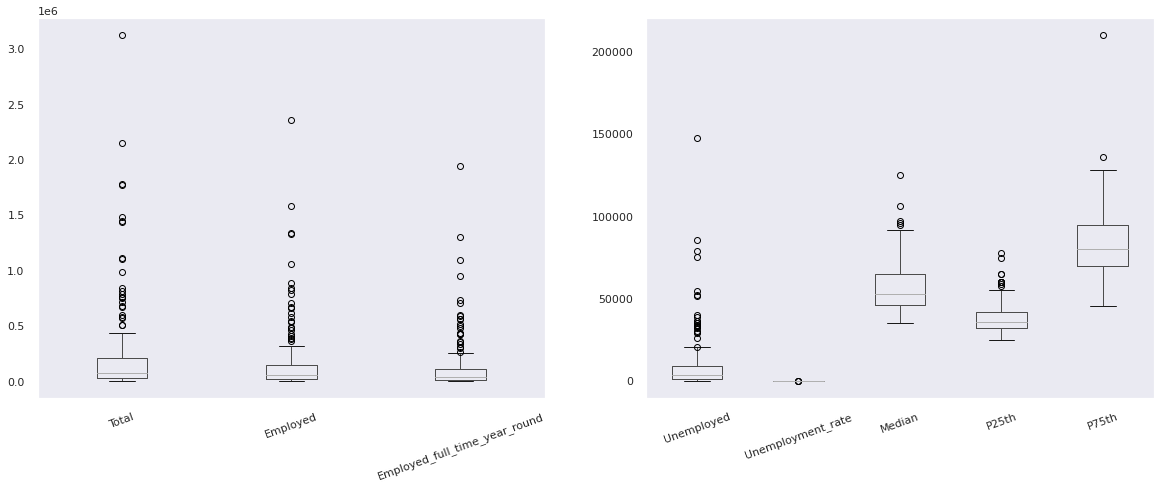

In [181]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
boxplot = employed_students_df.iloc[:,2:5].boxplot(grid=False, rot=20,figsize=(6,5))
plt.subplot(1,2,2)
boxplot = employed_students_df.iloc[:,5:].boxplot(grid=False, rot=20,figsize=(6,5))

As shown in the histograms above, the `total` students enrolled in a major, as well as the `employed` and `unemployed` students, contain several outliers (values that vear far from the average). 
> Note: this dataset appears to have jobs _with_ outlying numbers of employees, but perhpas due to the many more distinct career categories. 173 instead of 27, over five times more categories.

In [182]:
def displayOutliers(col,col_index,min_threshold,desc):
  total_outliers = employed_students_df[employed_students_df[col]>min_threshold]
  print(f'{desc} outliers: {total_outliers.iloc[:,:].shape[0]} ({total_outliers.shape[0]/employed_students_df.shape[0]*100:.0f}%)')
  return total_outliers.iloc[:,:]

total_outliers = displayOutliers('Total',2,500_000,'Total enrolled') #minimum thresholds are approximate, based on the outlier charts
employed_outliers = displayOutliers('Employed',3,250_000,'Total employed')
unemployed_outliers = displayOutliers('Unemployed',5,25_000,'Total unemployed')

Total enrolled outliers: 24 (14%)
Total employed outliers: 29 (17%)
Total unemployed outliers: 22 (13%)


The outliers consist of about 15% of the data. Those students appear to choose professions that have relatively high enrollment, high expected employment and even high unemployment. Though, the high unemployment could hold in fact the same percentage of jobs as the other major, due to the increased employment. 

Let's check that.

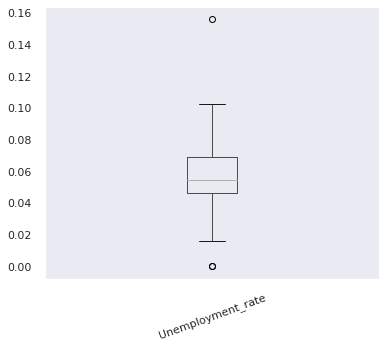

In [183]:
col = 'Unemployment_rate'
boxplot = employed_students_df.loc[:,[col]].boxplot(grid=False, rot=20,figsize=(6,5))

In [184]:
print(employed_students_df[employed_students_df[col]<.02])
print(employed_students_df[employed_students_df[col]>.14])

                                         Major  ...     P75th
26  EDUCATIONAL ADMINISTRATION AND SUPERVISION  ...   79000.0
51      GEOLOGICAL AND GEOPHYSICAL ENGINEERING  ...  125000.0
85                                PHARMACOLOGY  ...  105000.0

[3 rows x 10 columns]
                       Major Major_category  Total  ...  Median  P25th    P75th
146  MISCELLANEOUS FINE ARTS           Arts   8511  ...   45000  30000  60000.0

[1 rows x 10 columns]


>Note: There are no exceptionally lesser enrolled, lesser employed, nor lesser unemployed (in numbers) majors than the average.

Indeed, of the 173 jobs, 4 have exceptional unemployment rates. Thus the high student count, employment, and unemployment values remain relatively appropriate. 

Yet those majors still held higher enrollment.

In [185]:
print('Total outliers:',[x for x in total_outliers.index])
print('Employed outliers:',[x for x in employed_outliers.index])
print('Unemployed outliers:', [x for x in unemployed_outliers.index])

Total outliers: [13, 20, 25, 28, 40, 48, 54, 73, 75, 78, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]
Employed outliers: [13, 14, 20, 25, 28, 40, 46, 48, 54, 73, 75, 78, 90, 100, 112, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]
Unemployed outliers: [13, 20, 25, 28, 48, 73, 75, 78, 114, 121, 127, 132, 133, 138, 142, 153, 158, 159, 161, 164, 165, 171]


In [186]:
COL_INDECIES = [1,2,7]

total_outliers_indecies = np.union1d(total_outliers.index,employed_outliers.index)
total_outliers_indecies = np.union1d(total_outliers_indecies,unemployed_outliers.index)

print('All outliers:')
print(employed_students_df.iloc[total_outliers_indecies, COL_INDECIES].sort_values(by='Total',ascending=False),'\n')

xor_total_emp_outliers = np.setxor1d(employed_outliers.index,total_outliers.index)
xor_total_unemp_outliers = np.setxor1d(unemployed_outliers.index,total_outliers.index)
unique_outliers_indecies = np.union1d(xor_total_emp_outliers, xor_total_unemp_outliers)
unique_outliers_df = employed_students_df.iloc[unique_outliers_indecies,:].sort_values(by='Total',ascending=False)

print('Unique outliers:')
print(unique_outliers_df.iloc[:,COL_INDECIES],'\n')

All outliers:
                          Major_category    Total  Median
161                             Business  3123510   58000
158                             Business  2148712   60000
159                             Business  1779219   65000
153                               Health  1769892   62000
114             Psychology & Social Work  1484075   45000
28                             Education  1446701   40000
25                             Education  1438867   43000
164                             Business  1114624   56000
73             Humanities & Liberal Arts  1098647   50000
13           Communications & Journalism   987676   50000
78                Biology & Life Science   839454   51000
165                             Business   816548   65000
20               Computers & Mathematics   783292   78000
127                       Social Science   757616   69000
121                  Law & Public Policy   757141   50000
132                       Social Science   748956   58000


In [187]:
unique_outliers_df.iloc[:,[1,2,3,5,6,7]]

,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median
54,Engineering,581529,422207,19360,0.043844,80000
40,Engineering,503080,359172,17986,0.047688,75000
90,Computers & Mathematics,432806,280902,15701,0.052936,66000
112,Physical Sciences,427953,308461,14613,0.045231,56000
14,Communications & Journalism,418104,314438,20754,0.061917,50000
46,Engineering,358593,262831,14823,0.053387,78000
100,Industrial Arts & Consumer Services,350409,286683,14108,0.046903,44000


Only 7 of the 173 majors (4%) are not fully consistent with the total enrolled, employed, and unemployed... but we will not drop them, as they hold a few `Engineering` majors, which may be helpful for predicting eventual future more desired jobs (according solely to personal prediction).

Here are the most common major categories among the top ten majors:

In [188]:
def getTopEnrollment(rows):
  return employed_students_df.loc[:,:].sort_values(by='Total',ascending=False).iloc[rows,:]

def displayTopEnrollmentMajors(rows):
  COLUMNS = ['Major_category','Total','Median','P75th']

  top_enrollment_df = getTopEnrollment(rows)
  print(top_enrollment_df[COLUMNS[0]].value_counts(),'\n')
  print(top_enrollment_df.loc[:,COLUMNS],'\n')

  median_salary = np.median(top_enrollment_df.loc[:,[COLUMNS[2]]])
  median_75th = np.median(top_enrollment_df.loc[:,[COLUMNS[3]]])
  print('Median salary:', int(median_salary))
  print('Median 75th percentile salary:', int(median_75th))
  return top_enrollment_df
enrollment_top_11 = displayTopEnrollmentMajors(range(11))

Business                       4
Education                      2
Psychology & Social Work       1
Health                         1
Biology & Life Science         1
Communications & Journalism    1
Humanities & Liberal Arts      1
Name: Major_category, dtype: int64 

                  Major_category    Total  Median     P75th
161                     Business  3123510   58000   86000.0
158                     Business  2148712   60000   95000.0
159                     Business  1779219   65000  100000.0
153                       Health  1769892   62000   80000.0
114     Psychology & Social Work  1484075   45000   68000.0
28                     Education  1446701   40000   50000.0
25                     Education  1438867   43000   59000.0
164                     Business  1114624   56000   90000.0
73     Humanities & Liberal Arts  1098647   50000   75000.0
13   Communications & Journalism   987676   50000   80000.0
78        Biology & Life Science   839454   51000   80000.0 

Median sal

>Remember: The average **major enrollment** is 75,000. Minimum 2,000. Maximum 3 million. The average **median salary** is \$56,000 USD. Minimum \$35,000. Maximum $1,250,000. The average **75th salary percentile** is \$82,500 USD. Minimum \$46,000. Maximum \$2,100,000.

The highest enrollment majors have about (and sometimes slightly higher than) a median salary... but in fact a lower median salary and median 75th percentile _than when including the lesser enrolled majors!_ The more enrolled majors are thus not solely due to exceptionally high salaries.

The most common of the highest enrolled majors is `Business`. (One could  have expected `Engineering`, but those come later to be more common, starting around the top 20s (as demonstrated below). Apparently, students do not want or perhpas convince themselves that they are not mentally fit for 'the more analytical professions'.)

Does the second top ten have a different major group?

In [189]:
enrollment_20_30 = displayTopEnrollmentMajors(range(20,31))

Engineering                            3
Industrial Arts & Consumer Services    2
Arts                                   2
Psychology & Social Work               1
Physical Sciences                      1
Communications & Journalism            1
Computers & Mathematics                1
Name: Major_category, dtype: int64 

                          Major_category   Total  Median     P75th
54                           Engineering  581529   80000  110000.0
138                                 Arts  571961   45000   70000.0
142                                 Arts  504657   46600   70000.0
40                           Engineering  503080   75000  100000.0
90               Computers & Mathematics  432806   66000  100000.0
112                    Physical Sciences  427953   56000   85000.0
14           Communications & Journalism  418104   50000   80000.0
70   Industrial Arts & Consumer Services  402038   40500   60000.0
46                           Engineering  358593   78000  105000.0
100  I

`Engineering` is the most common in this second group. Then `General\Industrial Arts`. Yet about the same below median salaries.

Do students enroll in majors based on employment? Let's check.

In [190]:
def displayOutliersPerColumn(col,col_indicies,min_threshold):
  outliers = employed_students_df[employed_students_df[col]>min_threshold].iloc[:,col_indicies].sort_values(by=col,ascending=False) #these are the outliers and extraordinarily employed majors
  print(f'{col} outliers: {outliers.shape[0]}\n')
  print(outliers['Major_category'].value_counts())
  return outliers 

emp_outliers = displayOutliersPerColumn('Employed',[0,1,3],250_000)
top = getTopEnrollment(range(emp_outliers.shape[0]))
top_employed_not_top_enrolled_indecies = np.setdiff1d(emp_outliers.index, top.index)
top_enrolled_not_top_employed_indecies = np.setdiff1d(top.index, emp_outliers.index)

print('\nTop employed (but not top enrolled): indecies',top_employed_not_top_enrolled_indecies)
print('Top enrolled (but not top employed): indecies',top_enrolled_not_top_employed_indecies)

Employed outliers: 29

Business                               5
Engineering                            4
Social Science                         3
Humanities & Liberal Arts              3
Education                              2
Arts                                   2
Computers & Mathematics                2
Communications & Journalism            2
Psychology & Social Work               1
Industrial Arts & Consumer Services    1
Health                                 1
Biology & Life Science                 1
Physical Sciences                      1
Law & Public Policy                    1
Name: Major_category, dtype: int64

Top employed (but not top enrolled): indecies [100]
Top enrolled (but not top employed): indecies [70]


Wow, there is almost a complete overlap with employment and enrollment: the more enroll, apparently the more are employed. (And as we saw, percentage-wise there was not necessarily a dramatically higher unemployment rate.) 

`Business` majors again appear to have especially high employment, now noticeably followed by `Engineering`.

Part 3: Data Preparation
==

Here are the most enrolled major catgories, and some brief correlations:

In [191]:
employed_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_all_students_2010_2012.csv") # sperate init for part 3
employed_students_df = employed_students_df.drop(['Major_code'],axis='columns') 

employed_college_students_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/employment_college_students_2010_2012.csv")
employed_college_students_df = employed_college_students_df.drop(['Major_code','Sample_size'],axis='columns').replace(np.NAN,0)  

def sortPivot(df, col):
  print(df.sort_values(by=col,ascending=False).loc[:,[col]],'\n')

pivot_sum = employed_students_df.pivot_table(index='Major_category',aggfunc='sum')
sortPivot(pivot_sum,'Total')
sortPivot(pivot_sum,'Employed')
sortPivot(pivot_sum,'Median')
sortPivot(pivot_sum,'Unemployment_rate')

                                       Total
Major_category                              
Business                             9858741
Education                            4700118
Humanities & Liberal Arts            3738335
Engineering                          3576013
Health                               2950859
Social Science                       2654125
Psychology & Social Work             1987278
Arts                                 1805865
Communications & Journalism          1803822
Computers & Mathematics              1781378
Biology & Life Science               1338186
Industrial Arts & Consumer Services  1033798
Physical Sciences                    1025318
Law & Public Policy                   902926
Agriculture & Natural Resources       632437
Interdisciplinary                      45199 

                                     Employed
Major_category                               
Business                              7529851
Education                             2833199
Engi

`Employed` appears to very closely follow total enrollment, with a noticeable slight exception of `Engineering` above `Humanities & Liberal Arts` in employment but lower in enrollment. `Engineering` also rises to the top of the `Median` salaries, along with `Computers & Mathematics` and
`Biology & Life Science` not too far behind, yet lower on student enrollment. 

Though the `Unemployment_rate` is not as linearly related; perhpas a heatmap could help note the general relationship to `Median` and `Total`. 

Which columns are unnecessary or correlate to other columns, and could be removed? 

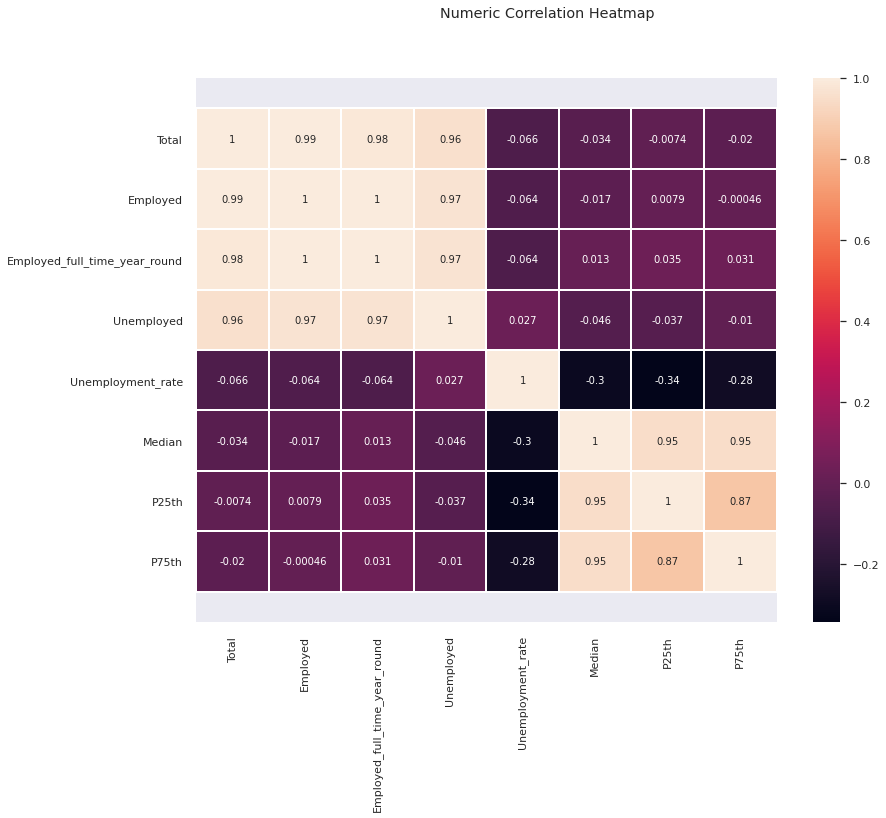

In [192]:
backup_all_students = employed_students_df.copy()
backup_college_students = employed_college_students_df.copy()

def displayHeatmap(df,numeric_index_start):
  fig = plt.figure(figsize=(13, 10)) 

  numeric_students_df = df.iloc[:,numeric_index_start:]
  corr = numeric_students_df.corr()
  sns.heatmap(corr, linewidth=1,annot=True,annot_kws={'size':10})

  b, t = plt.ylim()
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t) 
  fig.suptitle('Numeric Correlation Heatmap')   
  plt.show()
  
displayHeatmap(employed_students_df,2)

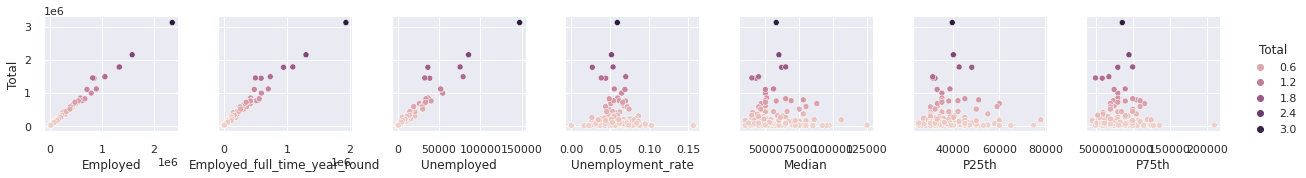

In [193]:
ENROLLED = 'Total'
sns.pairplot(employed_students_df.iloc[:,1:], hue=ENROLLED, y_vars=ENROLLED)
plt.show()

`Employed`, `Employed_full_time_year_round`, and `Unemployed` are all tremendously correlated to high enrollment! All above 95%. 

`P25th` is the least correlated to high enrollment, all the salary columns in fact with negative correlations to enrollment. According to the heatmap, the `Unemployment_rate` has a mostly inverse relation to `Total` enrollment and `Medain` salary. (Even though the pivot table above displayed that `Engineering` held the highest pay and yet the (relatively) highest `Unemployment_rate`).

Though, `Employed_full_time_year_round` is 100% correlated to `Employed`, so it could be deleted. `Unemployed` is also mostly identiacal in correlation. Same with `Median` and `P25th`, so the latter will be removed.

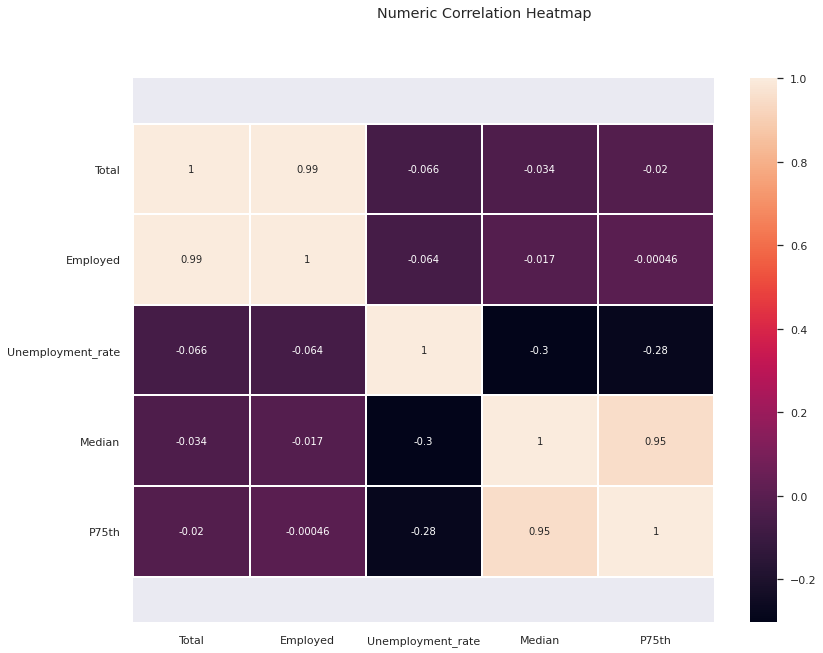

In [194]:
employed_students_reduced_cols_df = employed_students_df.copy()
employed_students_reduced_cols_df.drop(columns=['Employed_full_time_year_round','Unemployed','P25th'], inplace=True)

displayHeatmap(employed_students_reduced_cols_df,0)

Though, perhaps more factors could help predict high enrollment. 

Let's try the second dataset, which focuses only on college gradutes.

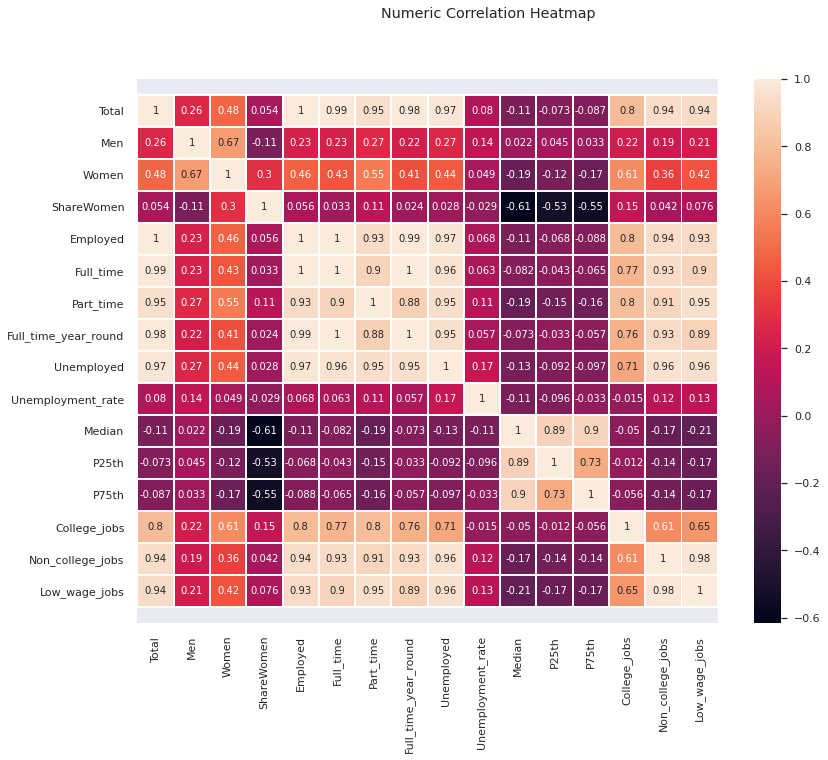

In [195]:
displayHeatmap(employed_college_students_df,3)  

The final three columns (`College jobs`, `Non_college_jobs`, and `Low_wage_jobs`) also have high correlation to enrollment. (That said, also fairly high correlation to the employment variables we already are using.) And the salary columns have risen in correlation as well!

Here is a more linear visual of the correlations, according to the Pearson algorithm:

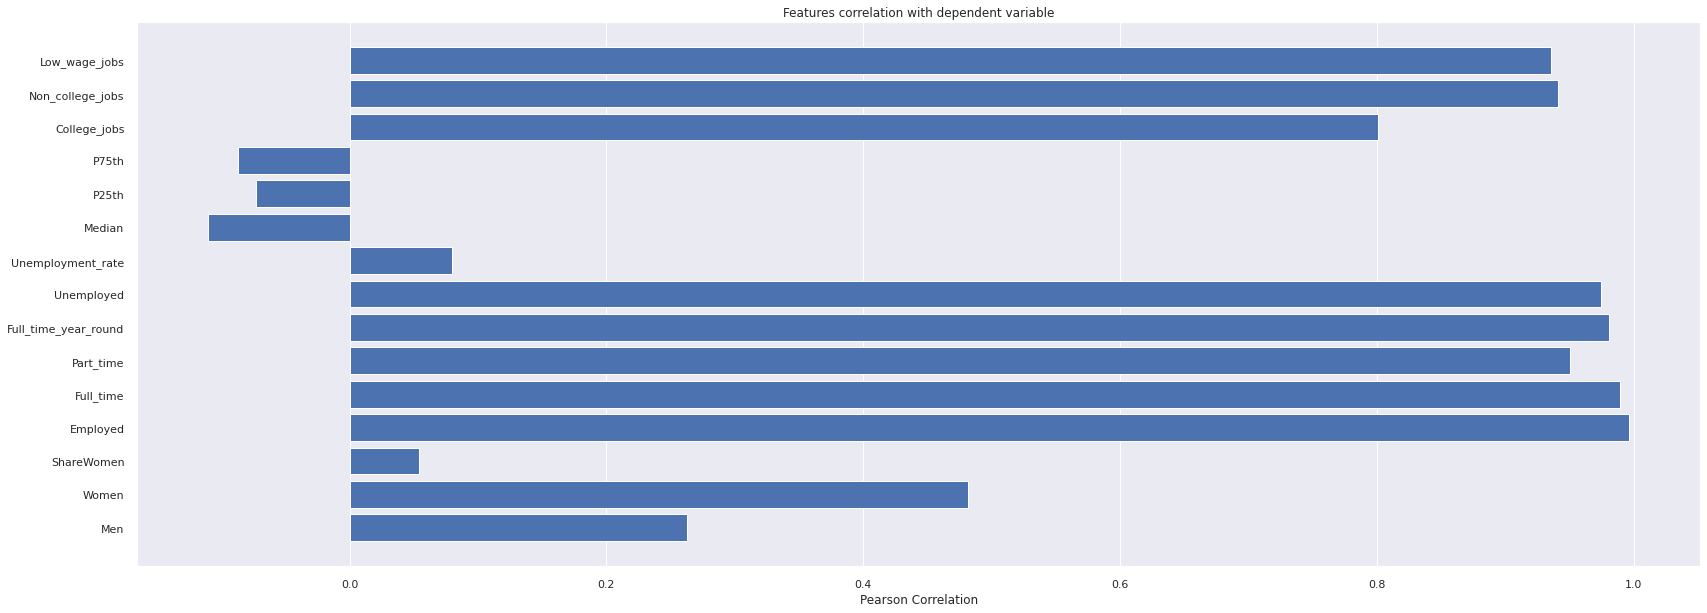

In [196]:
from yellowbrick.target import FeatureCorrelation

numeric_college_df = employed_college_students_df.iloc[:,3:]
target = numeric_college_df['Total']
features = numeric_college_df.drop('Total',axis=1).copy()
feature_names = list(features.columns)

visualizer = FeatureCorrelation(labels=feature_names,method='pearson')
visualizer.fit(features,target)
visualizer.poof()

Most columns are highly related! Perhaps the feature selection will intentioanlly exclude some of the higher correlating columns.

Let's test this dataset. Now to select the best features.

In [197]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [198]:
X = employed_college_students_df.iloc[:,4:].copy() #the numeric columns, less the target column
y = employed_college_students_df.iloc[:,3].copy() #the target column, 'Total'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

X_train.head()

,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
101,2682,26057,0.906677,14643,10732,6541,7588,1088,0.069163,35000,20000,50000,6587,6894,2237
158,404,1084,0.728495,24202,18079,8767,13944,1617,0.062628,29000,22000,38000,9927,12037,3304
98,23736,48883,0.673143,45326,38815,10948,30932,3305,0.067961,35000,27000,47000,9659,23059,7214
61,4419,371,0.077453,11581,9441,4590,6183,1067,0.084361,40000,29000,47000,7225,3145,1168
24,13496,5217,0.278790,16413,15141,2420,13017,1015,0.058240,51000,38000,60000,6342,5741,708


Now to normalize the numeric column rows:

In [199]:
pd.options.mode.chained_assignment = None

sc = StandardScaler()
for i in X.columns:
  X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))

X_train.head()

,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
101,-0.473532,0.083906,1.628591,-0.336490,-0.361144,-0.165158,-0.367481,-0.339747,0.012980,-0.396267,-0.983529,-0.027007,-0.280361,-0.274901,-0.248540
158,-0.553052,-0.587080,0.841230,-0.132549,-0.179700,0.012207,-0.166404,-0.194212,-0.208014,-0.933904,-0.768569,-0.888849,-0.112805,-0.050249,-0.077359
98,0.261422,0.697206,0.596642,0.318130,0.332405,0.185988,0.371024,0.270180,-0.027673,-0.396267,-0.231170,-0.242467,-0.126249,0.431205,0.549932
61,-0.412897,-0.606237,-2.035620,-0.401817,-0.393027,-0.320612,-0.411929,-0.345525,0.526980,0.051764,-0.016211,-0.242467,-0.248355,-0.438662,-0.420042
24,-0.096036,-0.476032,-1.145943,-0.298727,-0.252258,-0.493516,-0.195730,-0.359831,-0.356437,1.037432,0.951107,0.691195,-0.292652,-0.325266,-0.493841


Now the primary features will be selected using **Decision Tree Regressor**. 
>Note: Often Recursive Feature Elimination with Cross Validation (RFECV) is used, but was not working for the analyst presently. 
>
>`ValueError: n_splits=10 cannot be greater than the number of members in each class.`

In [200]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

decision_tree = DecisionTreeRegressor(max_depth=6)
decision_tree.fit(X, y)

predictors = X.columns
coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Men                     0.000000
Unemployed              0.000000
Median                  0.000000
College_jobs            0.000000
Non_college_jobs        0.000000
ShareWomen              0.000088
Unemployment_rate       0.000194
Part_time               0.000236
P75th                   0.000243
P25th                   0.000394
Full_time_year_round    0.001421
Women                   0.001952
Low_wage_jobs           0.098570
Employed                0.130324
Full_time               0.766577
dtype: float64


In [201]:
top_features = [x for x in coef.index]
max_threshold = 0.00013
top_features = [x for x in coef.index if coef[x] < max_threshold]
print(f'Top Features:', top_features)

CV = 10
cv_scores = cross_val_score(decision_tree, X, y, cv=CV)
mean_cv_score = np.mean(cv_scores)
print('Cross validation score:', mean_cv_score)

Top Features: ['Men', 'Unemployed', 'Median', 'College_jobs', 'Non_college_jobs', 'ShareWomen']
Cross validation score: 0.9140086544700248


To avoid overfitting the data, especially since RFECV is not used, cross validation is employed using `cross_val_score()`. The features selected produced a 96% accuracy of predicting future data rows (hopefully not too precisely overfitted).

Now let's build some prediction models to demonstrate the ideal future combination of features.

Part 4: Regression and Classification Models
==

##Regression Models

###**1. Multiple Linear Regression - Ordinary Least Squares**


OLS Regression estimates the values of m and b in a manner that minimizes the sum of the squares of the differences between the given dependent variable values and the predicted dependent variable values. The prediction algorithm uses the slope formula for a straight line: $y = mx + b$. As usual, x is the independant and y the dependent variable.

See [here](https://medium.com/analytics-vidhya/probabilistic-model-selection-with-aic-bic-in-python-f8471d6add32) for more details on Mean Squared Error.

Here is the mean accuracy of our selected RFECV features:

In [202]:
X_features = employed_college_students_df.loc[:,top_features]
y_features = employed_college_students_df.loc[:,['Total']]
X_train_features, X_test_features, y_train_features, y_test_features = train_test_split(X_features, y_features, test_size=0.3, random_state=12)

model_ols = LinearRegression()

def displayCVScore(model):
  scores = cross_val_score(model, X_train_features, y_train_features, cv=CV)
  print(f'Model predicition accuracy for each of the {CV} data subsets:\n {scores}\n')
  print('Mean Accuracy:', np.mean(scores))  

def displayMSE(model, X_test, y_test):
  y_test_predicted = model.predict(X_test)
  res = mean_squared_error(y_test.T.squeeze(), y_test_predicted)
  print(f'Mean Squared Error: {res:,}')

displayCVScore(model_ols)

model_ols.fit(X_train_features, y_train_features)
displayMSE(model_ols,X_test_features,y_test_features)

Model predicition accuracy for each of the 10 data subsets:
 [0.9764232  0.95527834 0.98119428 0.98622732 0.98538508 0.99344499
 0.93265791 0.98044196 0.91967123 0.99537886]

Mean Accuracy: 0.9706103178026773
Mean Squared Error: 168,408,873.27542618


Around 90% accuracy is pretty impressive! 

>Note: The lower `cv` parameter in RFECV produced a higher score in this case, based on testing outside this project. But perhpas less reliable to predict other datasets.

To analyze some of the regression statistics with the detialed OLS Regression results:

In [203]:
X_ols = sm.add_constant(X_train_features)
result_ols = sm.OLS(y_train_features, X_ols).fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1477.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.37e-105
Time:                        23:01:48   Log-Likelihood:                -1236.3
No. Observations:                 121   AIC:                             2487.
Df Residuals:                     114   BIC:                             2506.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.135e+04   4394.163  

* Perfect `Omnibus Probility` statistic: meets the null hypothesis at 0.00 
*Very high `Ajusted R-squared` score
* Most columns have an f-statstic below 0.050!
* `AIC` around 2500-2600 (used for comparing prediction models)

Though,
* Low `Skew`, and `Kurtosis` above 3, which imply slightly right-skewed distribution
* Very high `Conditional number`, much above 30 and implying colinear columns
*Salary related features (eg. `P25th`, `Median`), like some others, have a higher than desired f-statistic. 
*`Jarque-Bera Probibility` and `F-statistic Probability` are negative, implying a less than ideal model choice.

####**Removing the features with an f-statistic that is too high could contribute to a more accurate regression model.**

>Note: calculating an `R-squared` accuracy statistic is only appropriate for linear regression models.

###**2. Possion Regression**


Poisson regression is another linear regression used to model discrete, "count data" and calculate contingency tables for variable frequencies. See [here](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4) for more details.

In [204]:
model_poisson = sm.GLM(y_train_features, X_train_features, family=sm.families.Poisson())
model_poisson_fitted = model_poisson.fit()
print(model_poisson_fitted.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  121
Model:                            GLM   Df Residuals:                      115
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3524e+06
Date:                Wed, 30 Jun 2021   Deviance:                   8.7033e+06
Time:                        23:01:48   Pearson chi2:                 3.74e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Men               1.691e-05   1.31e-08  

In [205]:
def display_R2_AIC(model):
  y_predicted = model.get_prediction(X_train_features).summary_frame()['mean']
  print(f'R2 Score: {r2_score(y_train, y_predicted):,}')
  print(f'AIC: {model.aic:,}')

display_R2_AIC(model_poisson_fitted)

R2 Score: -0.669342461650456
AIC: 8,704,734.57745834


The f-statistic is perfect for each of the features!... yet the predcition score is negative, implying a poor model for this data. The `AIC` is also much higher than the other models so far. 

###**3. Negative Binomial Regression**

Negative binomial regression is a popular generalization of Poisson regression, as it loosens the assumption that "variance" is equal to the "mean" of a Poisson model. 

In [217]:
model_nb = sm.GLM(y_train_features, X_train_features, family=sm.families.NegativeBinomial()).fit(method="lbfgs") 
print(model_nb.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  121
Model:                            GLM   Df Residuals:                      115
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                -1405.1
Date:                Wed, 30 Jun 2021   Deviance:                       241.55
Time:                        23:05:58   Pearson chi2:                     185.
No. Iterations:                     1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Men              -1.372e-06   3.85e-06  

In [218]:
display_R2_AIC(model_nb)

R2 Score: -3,278,514.9912768365
AIC: 2,822.1677941381317


The `r2 score` is negative (and thus not the best model) and the `AIC score` is higher than that of the original OLS model. Defineitly not the model for these features.
>Note: In other test, adding the `alpha` value to the `NegativeBinomial()` constructor perhpas aids the model's accuracy, but the score is surely not higher.

##Classification Models

###**4. Binary Logistic Regression**

Logistic regression is applicable when the response variable is binary (ie. categorical). Logistic regression uses a maximum likelihood method of estimation to predict the logarithmic probability of the response variable equal to 1:

$$ log[p(X)/(1-p(X))]=β0 + β1X1 + β2X2 + … + βpXp $$

where:

$Xn$: The nth predictor variable

$βn$: The coefficient estimate for the nth predictor variable

Let's see if there are any obviuos `Total` enrollment trends with `Majors` that have 0 in any of their column values:

In [219]:
zero_indecies_set = set()

for col in employed_college_students_df.iloc[:,3:].columns:
  has_zero = employed_college_students_df[col] == 0
  col_with_zero = employed_college_students_df[has_zero]

  if col_with_zero.empty == False:
    for x in col_with_zero.index:
      zero_indecies_set.add(x)

zero_indecies_list = [x for x in zero_indecies_set]
zeroes_df = employed_college_students_df.iloc[zero_indecies_list,:].copy().sort_values(by='Total',ascending=False)
zeroes_df.drop(columns=['Rank','ShareWomen','Unemployment_rate'], inplace=True) #these are percentages, which would follow its represented column
zeroes_df

,Major,Major_category,Total,Men,Women,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
65,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,8804,124,0,7502,7001,1240,5825,416,40000,30400,56000,2446,3896,386
83,BOTANY,Biology & Life Science,1329,626,703,1010,946,169,740,0,37000,26000,40000,677,184,56
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,758,1069,150,692,40,70000,43000,80000,529,102,0
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,648,558,133,340,16,73000,50000,105000,456,176,0
55,SCHOOL STUDENT COUNSELING,Education,818,1667,2164,730,595,135,545,88,41000,41000,43000,509,221,0
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,804,78253,63698,703,733,0,504,0,34000,29000,35000,346,206,111
112,SOIL SCIENCE,Agriculture & Natural Resources,685,4266,13843,613,488,185,383,0,35000,18500,44000,355,144,0
52,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,609,803,10320,559,584,0,391,0,42000,30000,78000,452,67,25
73,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,124,1756,1323,0,111,0,111,0,40000,40000,40000,0,0,0


In [220]:
top_enrollment = employed_college_students_df.loc[:,['Major','Major_category','Total']].sort_values(by='Total',ascending=False).head(11)
top_enrollment

,Major,Major_category,Total
145,PSYCHOLOGY,Psychology & Social Work,393735
76,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,329927
123,BIOLOGY,Biology & Life Science,280709
57,GENERAL BUSINESS,Business,234590
93,COMMUNICATIONS,Communications & Journalism,213996
34,NURSING,Health,209394
77,MARKETING AND MARKETING RESEARCH,Business,205211
40,ACCOUNTING,Business,198633
137,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,194673
78,POLITICAL SCIENCE AND GOVERNMENT,Social Science,182621


In order to have a binary, categorical column, the analyst was considering creating a new column representing come subgroup of `Majors` that contain zero values in their columns. 

But instead a new column will be created to divide the data into two groups: those in the top 33% enrollment, and those not in the top 33% (rather the lower 66%).

In [221]:
employed_college_students_ORDERBY_TOTAL = employed_college_students_df.copy().sort_values(by='Total',ascending=False)
TOP_THIRD_INDEX = int(employed_college_students_ORDERBY_TOTAL.shape[0]/3)

employed_college_students_ORDERBY_TOTAL.reset_index(inplace=True)
employed_college_students_ORDERBY_TOTAL.drop(columns=['index'],inplace=True)

top_third = employed_college_students_ORDERBY_TOTAL.loc[TOP_THIRD_INDEX,['Total']]
top_third_total_enrollment = top_third['Total']
employed_college_students_ORDERBY_TOTAL['Top_third_enrollment'] = employed_college_students_ORDERBY_TOTAL['Total'] >= top_third_total_enrollment

employed_college_students_ORDERBY_TOTAL.sort_values(by='Rank',inplace=True) #resort according to salary
employed_college_students_ORDERBY_TOTAL.head()

,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Top_third_enrollment
153,1,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,False
168,2,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,False
165,3,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,False
162,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,False
50,5,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,True


Let's replace the `Major_category` strings with integers, for potential categorical regression.

In [223]:
unique_categories_list = employed_college_students_ORDERBY_TOTAL["Major_category"].unique()
unique_categories_integers = range(len(unique_categories_list))
unique_categories_dict = dict(zip(unique_categories_list, unique_categories_integers))

employed_college_students_ORDERBY_TOTAL = employed_college_students_ORDERBY_TOTAL.replace({'Major_category': unique_categories_dict})
employed_college_students_ORDERBY_TOTAL.head()

,Rank,Major,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Top_third_enrollment
153,1,PETROLEUM ENGINEERING,0,2339,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,False
168,2,MINING AND MINERAL ENGINEERING,0,756,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,False
165,3,METALLURGICAL ENGINEERING,0,856,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,False
162,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0,1258,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,False
50,5,CHEMICAL ENGINEERING,0,32260,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,True


Now, let's build a `Logistic Regression` model to predict if a`Major` will hold the top third of student enrollments.

In [224]:
from sklearn.linear_model import LogisticRegression

top_features_AND_CATEGORY = top_features.copy()
top_features_AND_CATEGORY.insert(0,'Major_category')

X_binary = employed_college_students_ORDERBY_TOTAL.loc[:, top_features_AND_CATEGORY]
y_binary = employed_college_students_ORDERBY_TOTAL.loc[:,['Top_third_enrollment']]
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state=12)

scaler = StandardScaler()
X_train_binary = scaler.fit_transform(X_train_binary)

model_log = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=0) 
model_log.fit(X_train_binary, y_train_binary)

X_test_binary = scaler.transform(X_test_binary)
y_predicted = model_log.predict(X_test_binary)

training_score = model_log.score(X_train_binary, y_train_binary)
print('Prediction accuracy:', training_score)

Prediction accuracy: 0.9669421487603306


The prediction `accuracy` is similar to the `R-squared` score of the first OLS model!

Here is the accuracy of the binary prediction:

In [225]:
TOP_THIRD_ENR = 'Top_third_enrollment'
y_actual = y_test_binary[TOP_THIRD_ENR] 
y_test_predicted = model_log.predict(X_test_binary)

matrix = confusion_matrix(y_actual, y_predicted)
pd.DataFrame(matrix, columns=["Predicted Lower 66%","Predicted Top 33% Enrollment"], index=["True 66%", "True 33%"])

,Predicted Lower 66%,Predicted Top 33% Enrollment
True 66%,38,0
True 33%,0,14


* 38 true negatives (the lower 66%)
* 0 false positives (predicted `Top 33%` when True `Lower 66%`)
* 0 false negatives
* 14 true positives (the top 33%)

Wow! That adds to a total of 52 predictions, all predicted accurately from the test data!

>Note: (1) The reshuffled data produced a higher prediction `accuracy`! (The accuracy had been 96% prior, in a test outside this project.)
>
>(2) The analyst prefers the more simple `confusion_matrix` over the more detailed `crosstab()` matrix, as the labels more easily clarify the data presented.
>
> (3) And the `Mean squared error` and `cross validation` are not presently working. The sklearn module does not have AIC functionality. The analyst would need to use the statsmodel version, which presenstly returns the same error listed noted earlier. Same error for cross validation.

In [226]:
# displayMSE(model_log,X_test_binary,y_test_binary)
# print('AIC:',model_log) #currently with errors
# displayCVScore(model_log)

Here are some metrics from the binary classification. 

**Accuracy**: percent of accurate (true) predictions `(tp + tn) / (tp + tn + fp + fn)`

**Recall**: percent of positives accurately predicted `tp / (tp + fn)`

**Precision**: percent of true positives predicted `tp / (tp + fp)`

**Specificity**: percent of negatives accurately predicted `tn / (tn + fp)`

**F1**: harmonic mean between precision and recall





In [227]:
print(classification_report(y_test_binary, y_predicted))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        38
        True       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



See [here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) for details.

**Receiver Operating Characteristic** (ROC): displays the false positive rate (probability of prediction=1 and true value=0) on the X-axis, against the true positive rate (probability of prediction=1 and true value=1) on Y-axis. Ideally, the curve will climb quickly toward the top-left meaning the model correctly predicted the cases. Used to compare classification models. 

**Area Under the Curve** (AUC): definite integral, the area under thae graph; calculated by `Numpy` using the "trapezoidal rule". See [here](https://en.wikipedia.org/wiki/Trapezoidal_rule) for details.

Here is a visual of the prediction accuracy:

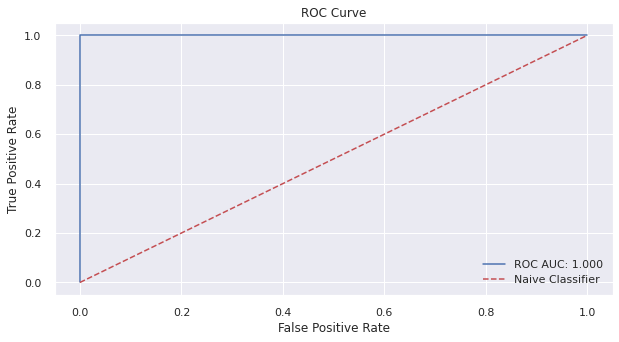

In [228]:
fig, ax = plt.subplots(figsize=(10,5))

y_predicted_probability = model_log.predict_proba(X_test_binary)[::,1]
fp_rate, tp_rate, _ = roc_curve(y_test_binary, y_predicted_probability)
auc = roc_auc_score(y_test_binary, y_predicted_probability)

plt.plot(fp_rate, tp_rate, label = "ROC AUC: %0.3f" % auc)
plt.plot([0, 1],[0, 1], 'r--', label = "Naive Classifier") #random classifier

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

A bit suspicious to have an accuracy so high...

###**5. K-Nearest Neighbours Classification (KNN)**

KNN is a "supervised" prediction algorithm, meaning that the data in the dataset must be clearly categorized. KNN is a non-parametric algorithm; no assumptions about the dataset are made regarding the data. Rather, the model is constructed entirely from the provided data. There is also no need to split the dataset into training and testing sets. See [here](https://www.unite.ai/what-is-k-nearest-neighbors/) for more details.

In [230]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=len(unique_categories_list)) #there _should_ be a group for every Major_category
model_knn.fit(X_binary, y_binary)

displayMSE(model_knn, X_binary, y_binary)

Mean Squared Error: 0.051503793352601156


Wow! That score is incredible! (The other scores were minimally in the hundred thousands.)

In [231]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(model_knn, parameters)
gridsearch.fit(X_train_binary, y_train_binary)

gridsearch.best_params_

{'n_neighbors': 7}

The ideal number of neighours for accurate prediction purposes is calculated at 7 neighbours.

Conclusion
==

Students appear to prefer `Business` and `Education` over `Engineering`-- at least before the top 20 highest enrolled majors. (And really, the top first most enrolled is `Psychology`.) Salary is **not** the primary determining factor of a students, though highly correlated. 

The OLS and Logistic Regression models appear the most reliable in this analysis of the datasets. (Surely the KNN model as well, though that one could be yet better researched by the analyst.) 

Now, to attempt to predict a student's prefered `Major category` based only on statistical preferences (eg. `Median` salary or `Women` in the field), wihtout personal interest in the field. The SVM will be used.

**Support Vector Machine (SVM)**

An SVM model represents different classes in a hyperplane, in multi-dimensional space. The hyperplane is generated in an iterative manner by the SVM to minimize the error. The dataset is divides into discrete classes to find the "maximum marginal hyperplane" (MMH). See [here](https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_support_vector_machine.htm) for details.

Here are the statistics from the most enrolled major, to see which features to attribute values for our questioning student (and a relatively appropriate value, respective to each feature):

In [232]:
employed_college_students_ORDERBY_TOTAL.loc[:,top_features_AND_CATEGORY].head(1)

,Major_category,Men,Unemployed,Median,College_jobs,Non_college_jobs,ShareWomen
153,0,2057,37,110000,1534,364,0.120564


Now, basically the point of this project, let's try to predict the `Major_category` based on the primary features:

In [237]:
from sklearn import svm

X = employed_college_students_ORDERBY_TOTAL.loc[:,top_features]
y = employed_college_students_ORDERBY_TOTAL.loc[:,['Major_category']]
svm = svm.SVR().fit(X,y)

MEN=3_000
UNEMPLOYMNET_RATE=0.2
MEDIAN=40_000
COLLEGE_JOBS=200
NON_COLLEGE_JOBS=20
SHARE_WOMEN=0.5
MAJOR_DETAILS = [MEN,UNEMPLOYMNET_RATE,MEDIAN,COLLEGE_JOBS,NON_COLLEGE_JOBS,SHARE_WOMEN]

predicted_major_index = svm.predict([MAJOR_DETAILS])
pmi_floor = int(predicted_major_index)

def getPrimaryThenSecondaryAdditions(svm_score):
  is_above_half = svm_score % 1 > 0.5
  return [1,0] if is_above_half else [0,1]

primary_addition, secondary_addition = getPrimaryThenSecondaryAdditions(predicted_major_index)
predicted_major_primary = unique_categories_list[pmi_floor + primary_addition]
predicted_major_secondary = unique_categories_list[pmi_floor + secondary_addition]

if predicted_major_index < 0:
  print('Indiscernable Major preference based on feature values chosen.')
else:
  print(f'Suggested Majors: leaning towards \"{predicted_major_primary}\", or perhpas \"{predicted_major_secondary}\"')
print(f'Major category index: {predicted_major_index[0]:.2}')

Suggested Majors: leaning towards "Industrial Arts & Consumer Services", or perhpas "Agriculture & Natural Resources"
Major category index: 5.7


That is very cool. 
>Note: the same prediction could be replicated for each specific `Major`!

And here are the `Major categories` and their indecies, for reference. Ordered by salary.

In [ ]:
unique_categories_dict

{'Agriculture & Natural Resources': 5,
 'Arts': 7,
 'Biology & Life Science': 10,
 'Business': 1,
 'Communications & Journalism': 14,
 'Computers & Mathematics': 4,
 'Education': 11,
 'Engineering': 0,
 'Health': 8,
 'Humanities & Liberal Arts': 12,
 'Industrial Arts & Consumer Services': 6,
 'Interdisciplinary': 15,
 'Law & Public Policy': 3,
 'Physical Sciences': 2,
 'Psychology & Social Work': 13,
 'Social Science': 9}

Thank G-d.
>Note: For a more precise major decision, the indeceies should be in progression based on `Total` enrollment, _not_ `Median` salary.

Just to check: do the natural groupings of students towards particular majors correlate or inversely correlate with predictions of `Major` automation.

In [238]:
automation_df = pd.read_csv("https://raw.githubusercontent.com/yabbou/Career_Forecasting/main/datasets/likelihood_of_automation_2013.csv",encoding='latin1')
automation_df.columns = ['Probability','SOC','Occupation']
automation_prob_occ_df = automation_df.loc[:,['Probability','Occupation']]
automation_prob_occ_df.head(30)

,Probability,Occupation
0,0.0028,Recreational Therapists
1,0.0030,First-Line Supervisors of Mechanics; Installer...
2,0.0030,Emergency Management Directors
3,0.0031,Mental Health and Substance Abuse Social Workers
4,0.0033,Audiologists
5,0.0035,Occupational Therapists
6,0.0035,Orthotists and Prosthetists
7,0.0035,Healthcare Social Workers
8,0.0036,Oral and Maxillofacial Surgeons
9,0.0036,First-Line Supervisors of Fire Fighting and Pr...


In [239]:
automation_prob_occ_df.tail(20)

,Probability,Occupation
682,0.98,Tellers
683,0.98,Umpires; Referees; and Other Sports Officials
684,0.98,Insurance Appraisers; Auto Damage
685,0.98,Loan Officers
686,0.98,Order Clerks
687,0.98,Brokerage Clerks
688,0.98,Insurance Claims and Policy Processing Clerks
689,0.98,Timing Device Assemblers and Adjusters
690,0.99,Data Entry Keyers
691,0.99,Library Technicians


The medical field, psychology majors, and some engineering majors are less likely to be automated right away. Generally in line with the more popular majors.